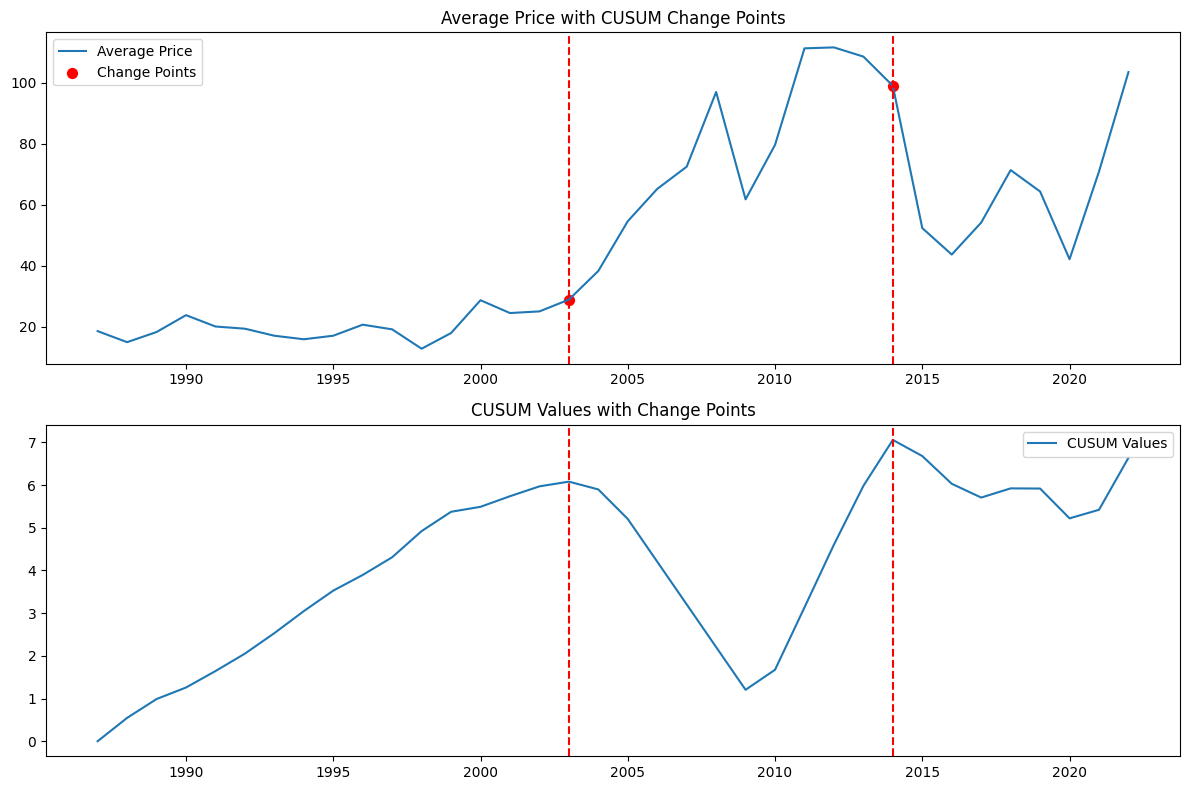

Change points detected using CUSUM occurred in years: [2003 2014]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

file_path = r"C:\Users\neba\Desktop\brent_oil\data\processed\BrentOilPrices_Cleaned.csv"
df = pd.read_csv(file_path)

def cusum_detection(signal, threshold=1.0):
    """
    Perform CUSUM change point detection
    
    Args:
        signal: Time series data
        threshold: Sensitivity threshold
    
    Returns:
        List of detected change points
    """
    # Standardize the signal
    s = (signal - np.mean(signal)) / np.std(signal)
    
    # Calculate cumulative sum
    cusum_pos = np.zeros(len(s))
    cusum_neg = np.zeros(len(s))
    
    for i in range(1, len(s)):
        cusum_pos[i] = max(0, cusum_pos[i-1] + s[i] - threshold)
        cusum_neg[i] = max(0, cusum_neg[i-1] - s[i] - threshold)
    
    # Combine positive and negative CUSUM
    cusum_combined = cusum_pos + cusum_neg
    
    # Find peaks in the combined CUSUM
    peaks, _ = find_peaks(cusum_combined, height=0.5, distance=5)
    
    return peaks, cusum_combined

# Example implementation on Avg_Price
signal = df['Avg_Price'].values
years = df['Year'].values

# Detect change points
change_points, cusum_values = cusum_detection(signal, threshold=0.5)

# Plot results
plt.figure(figsize=(12, 8))

# Plot 1: Original time series with change points
plt.subplot(2, 1, 1)
plt.plot(years, signal, label='Average Price')
for cp in change_points:
    plt.axvline(x=years[cp], color='r', linestyle='--')
plt.scatter(years[change_points], signal[change_points], color='red', s=50, label='Change Points')
plt.title('Average Price with CUSUM Change Points')
plt.legend()

# Plot 2: CUSUM values
plt.subplot(2, 1, 2)
plt.plot(years, cusum_values, label='CUSUM Values')
for cp in change_points:
    plt.axvline(x=years[cp], color='r', linestyle='--')
plt.title('CUSUM Values with Change Points')
plt.legend()

plt.tight_layout()
plt.show()

# Print the years where changes occurred
change_years = years[change_points]
print("Change points detected using CUSUM occurred in years:", change_years)

<Figure size 1200x600 with 0 Axes>

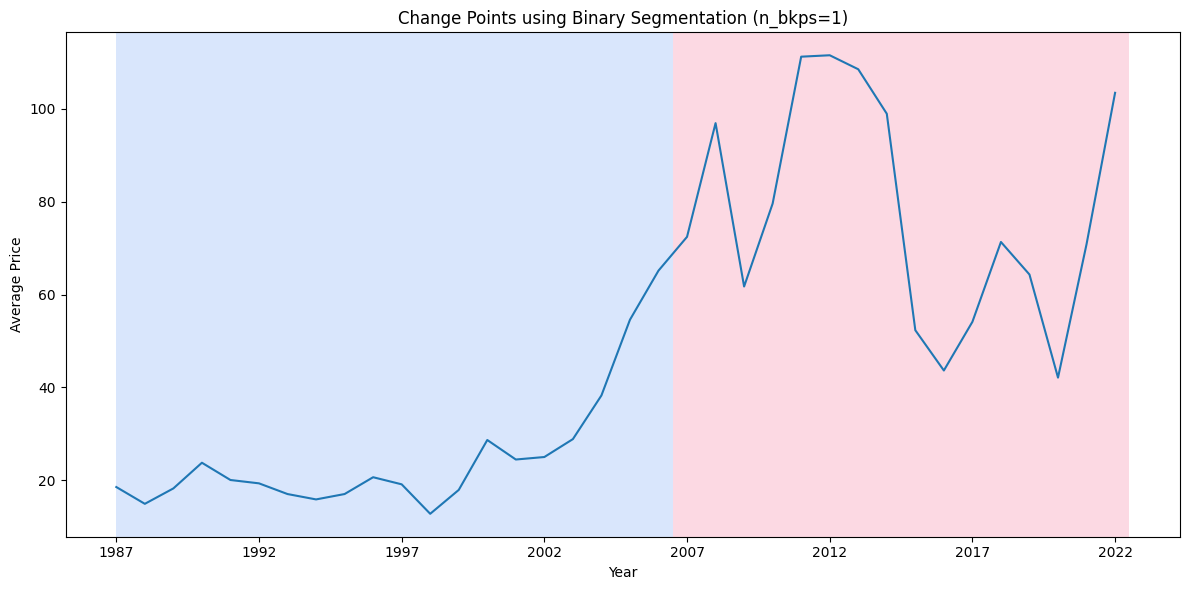

Change points detected using Binary Segmentation (n_bkps=1): [2007]


<Figure size 1200x600 with 0 Axes>

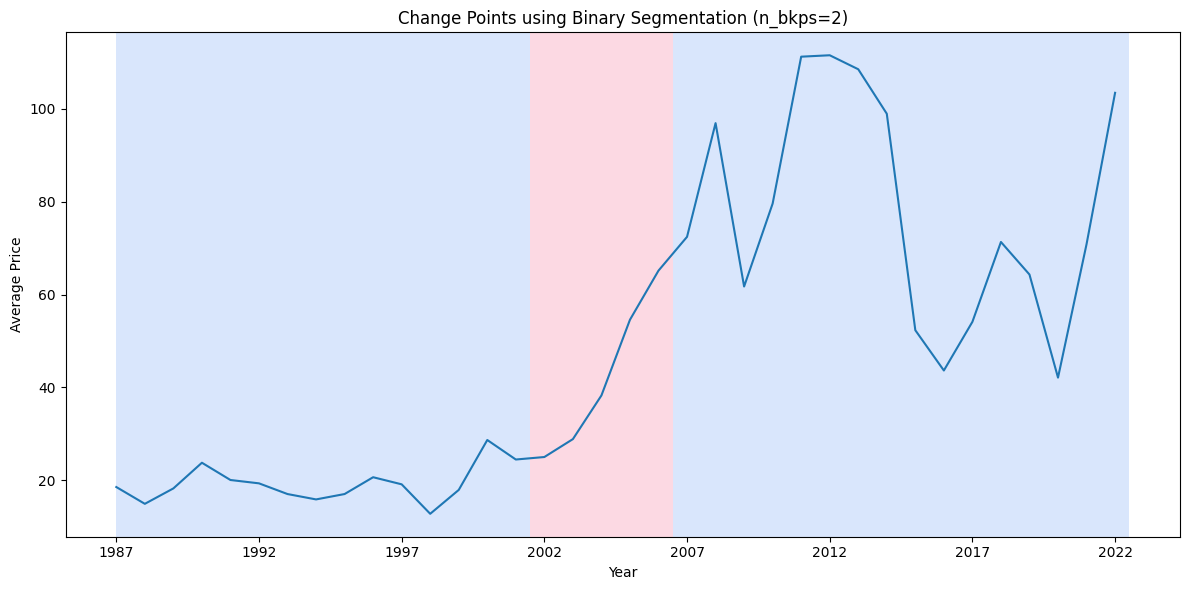

Change points detected using Binary Segmentation (n_bkps=2): [2002, 2007]


<Figure size 1200x600 with 0 Axes>

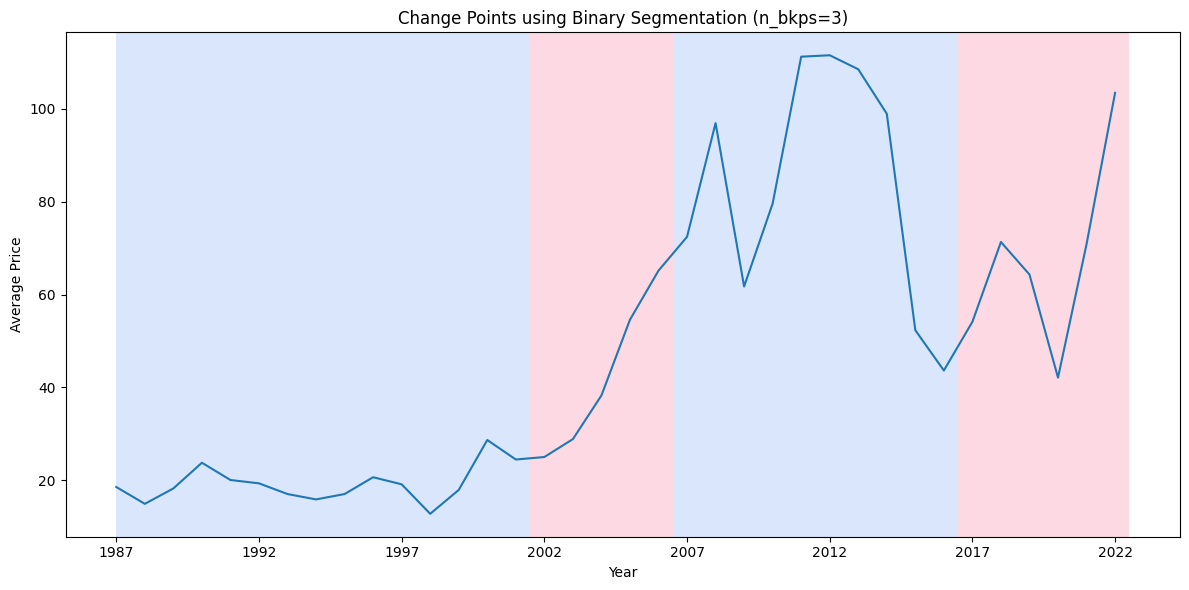

Change points detected using Binary Segmentation (n_bkps=3): [2002, 2007, 2017]


<Figure size 1200x600 with 0 Axes>

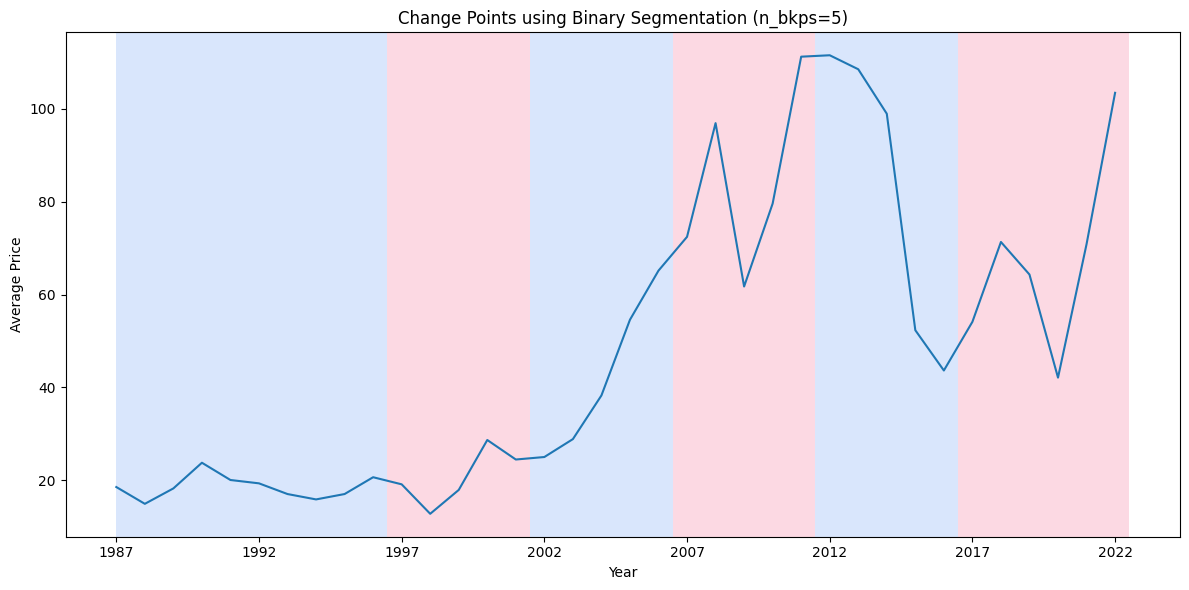

Change points detected using Binary Segmentation (n_bkps=5): [1997, 2002, 2007, 2012, 2017]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Perform change point detection using Binary Segmentation
def binary_segmentation(signal, years, n_bkps=5):
    """
    Perform Binary Segmentation change point detection
    """
    try:
        # Binary Segmentation
        model = "l2"  # Using L2 cost function for mean shifts
        algo = rpt.Binseg(model=model).fit(signal.reshape(-1, 1))
        result = algo.predict(n_bkps=n_bkps)

        # Plot results
        plt.figure(figsize=(12, 6))
        rpt.display(signal, result, figsize=(12, 6))
        plt.title(f'Change Points using Binary Segmentation (n_bkps={n_bkps})')

        # Add year labels to x-axis
        plt.xticks(np.arange(0, len(years), 5), years[::5])
        plt.xlabel('Year')
        plt.ylabel('Average Price')
        plt.tight_layout()
        plt.show()

        # Return the years where changes occurred
        change_points = [years[i] for i in result[:-1]]  # Exclude the last point
        return change_points
    except rpt.BadSegmentationParameters:
        print(f"Error: Could not find {n_bkps} breakpoints. Try a smaller number.")
        return []

# Example implementation on Avg_Price
file_path = r"C:\Users\neba\Desktop\brent_oil\data\processed\BrentOilPrices_Cleaned.csv"
df = pd.read_csv(file_path)

signal = df['Avg_Price'].values
years = df['Year'].values

# Detect change points with different numbers of breakpoints
for n_bkps in [1, 2, 3, 5]: #Reduced the number of breakpoints.
    change_points = binary_segmentation(signal, years, n_bkps=n_bkps)
    if change_points:
        print(f"Change points detected using Binary Segmentation (n_bkps={n_bkps}): {change_points}")

<Figure size 1200x600 with 0 Axes>

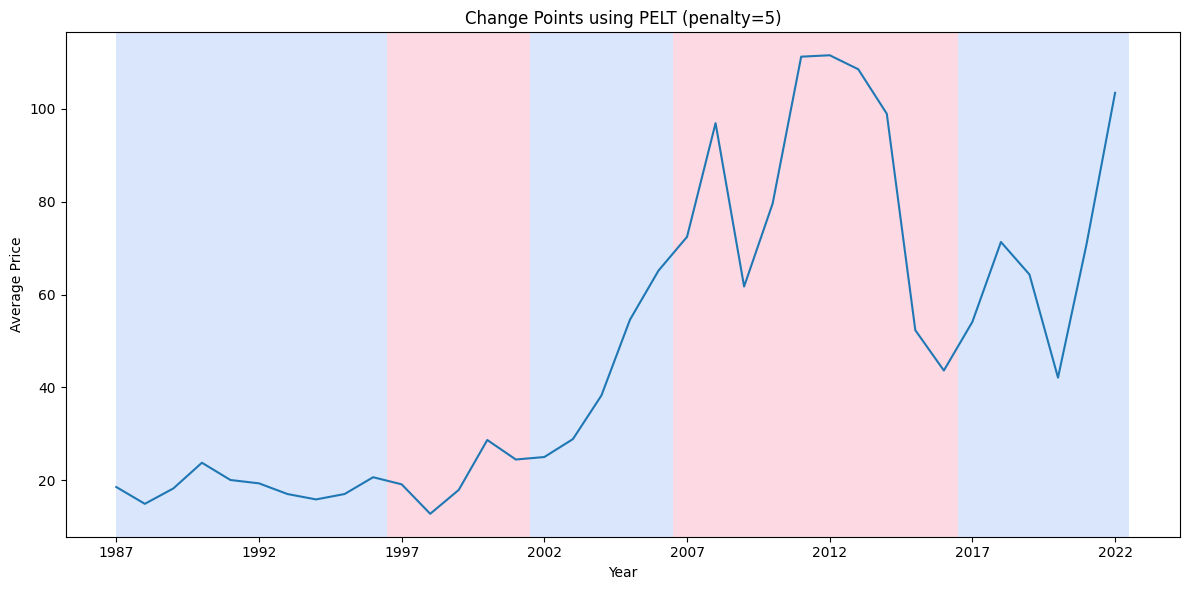

Change points detected using PELT (penalty=5): [1997, 2002, 2007, 2017]


<Figure size 1200x600 with 0 Axes>

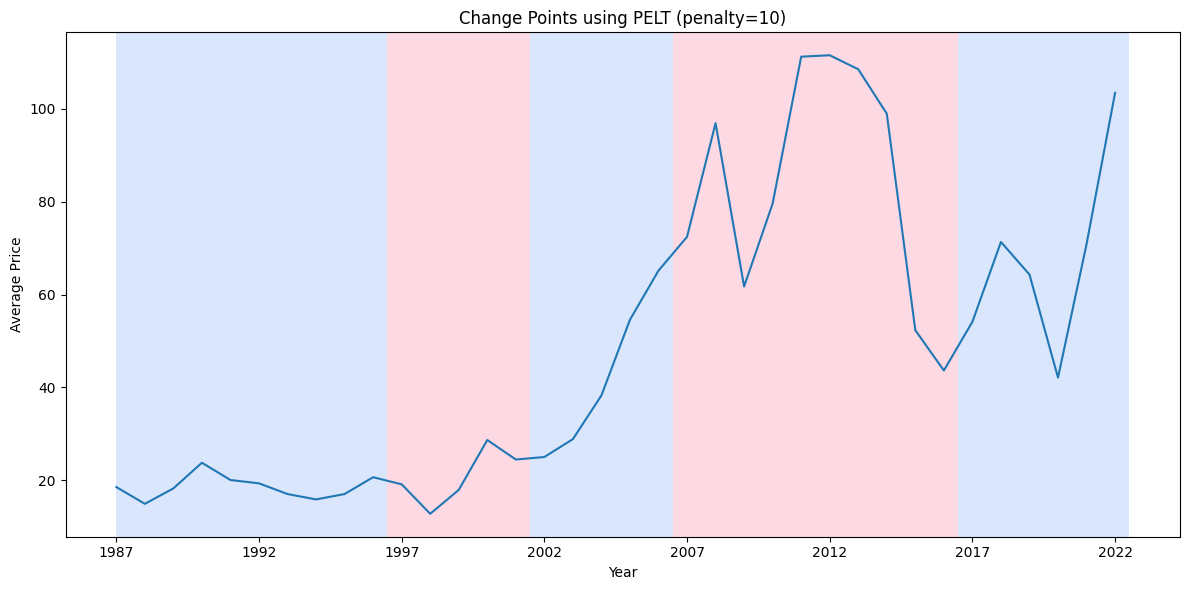

Change points detected using PELT (penalty=10): [1997, 2002, 2007, 2017]


<Figure size 1200x600 with 0 Axes>

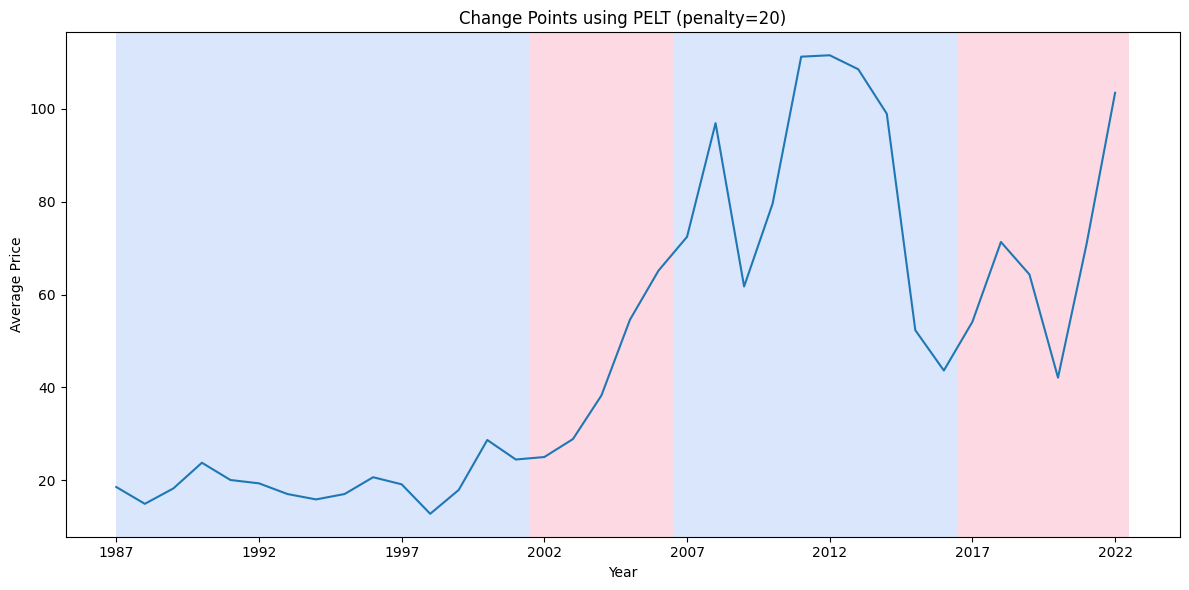

Change points detected using PELT (penalty=20): [2002, 2007, 2017]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ruptures as rpt

# Perform change point detection using PELT
def pelt_detection(signal, years, pen=10):
    """
    Perform PELT change point detection
    
    Args:
        signal: Time series data
        years: Corresponding years
        pen: Penalty parameter (controls sensitivity)
    
    Returns:
        List of detected change points
    """
    # PELT algorithm
    model = "l2"  # Using L2 cost function for mean shifts
    algo = rpt.Pelt(model=model, min_size=2).fit(signal.reshape(-1, 1))
    result = algo.predict(pen=pen)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    rpt.display(signal, result, figsize=(12, 6))
    plt.title(f'Change Points using PELT (penalty={pen})')
    
    # Add year labels to x-axis
    plt.xticks(np.arange(0, len(years), 5), years[::5])
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.tight_layout()
    plt.show()
    
    # Return the years where changes occurred
    change_points = [years[i] for i in result[:-1]]  # Exclude the last point as it's the end of the series
    return change_points

# Example implementation on Avg_Price
signal = df['Avg_Price'].values
years = df['Year'].values

# Detect change points with different penalty values
for pen in [5, 10, 20]:
    change_points = pelt_detection(signal, years, pen=pen)
    print(f"Change points detected using PELT (penalty={pen}): {change_points}")